<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Semanal Nº2 - TS2
#### Tomás Altimare Bercovich

# Resumen
En este trabajo práctico se realizó el análisis de diferentes sisemas LTI excitados con señales realizadas en el trabajo semanal anterior con un generador de señales, graficando las respuestas resultantes a dichas entradas. Se encontró la respuesta al impulso de los sistemas planteados a partir de la función Delta de Dirac utilizando propiedades de los sistemas LTI. Por último, se intentó discretizar la ecuación diferencial correspondiente al modelo Windkessel que describe la dinámica presión-flujo del sistema sanguíneo.

# Introducción Teórica
Cualquier sistema puede ser representado como una caja negra con una entrada y una salida, de la cual desconocemos su interior o funcionamiento, pero sabemos que al ingresarle un elemento "x", tendremos como salida, un elemento "y". En el análisis y procesamiento de señales nos va a interesar analizar estas cajas en dos dominios: en cantidad de sampleos (o en tiempo) y en frecuencia. De forma general, denominaremos "excitación" a la entrada de ésta caja, mientras que "respuesta" a la salida de la misma. A su vez, la notación variará según el dominio del que estemos hablando. Para el dominio del tiempo, nos referiremos a las variables de entrada y salida con minúsculas, mientras que para las del dominio de la frecuencia, en mayúsculas.

Por otro lado, se define que cada sistema tiene una respuesta diferente, la cual está dada por la respuesta al impulso h(t) (en el dominio del tiempo) y la función transferencia H(s) (en el dominio de la frecuencia), las cuales son definidas como:
\begin{equation}
y(t) = x(t)*h(t) \tag{1}
\end{equation}
\begin{equation}
Y(s) = X(S).H(s) \tag{2}
\end{equation}

Los sistemas pueden clasificarse de diversas formas, pero para el desarrollo de éste trabajo únicamente es necesario hablar de los sistemas lineales e invariantes en el tiempo (LTI). Estos sistemas se caracterizan por (como dice su nombre), devolver la misma salida sin importar el tiempo en el que ingrese la entrada: es decir, no importa cuándo es que x(t) ingresa, siempre termina devolviendo el mismo valor de y(t). A su vez, los sistemas LTI son caracterizados por cumplir que, al ingresar una señal del tipo "Delta de Dirac", su salida es la respuesta al impulso del sistema (h(t)).

La señal tipo "Delta de Dirac" (o función impulso unitario) tiene dos definiciones: para el caso continuo y el caso discreto. Para el análisis de señales, nos va a interesar definir la señal discreta, siendo ésta una señal que es cero en todo su dominio excepto en un punto, en el cual vale uno. Matemáticamente se define como:
Definición delta de Dirac
\begin{equation}
\delta_{[n-k]} = \begin{cases} 
1 & \text{si } n = k \\
0 & \text{si } n \neq k 
\end{cases} \tag{3}
\end{equation}
Siendo k un es un entero que indica el desplazamiento.

# Análisis y Desarrollo
En este trabajo se comenzó definiendo la siguiente ecuación en diferencias que modela un sistema LTI:

\begin{equation}
y[n] = 3\times 10^{-2} x[n] + 5\times 10^{-2} x[n-1] + 3\times 10^{-2} x[n-2] + 1.5\,y[n-1] - 0.5\, y[n-2]
\end{equation}

A partir de esta ecuación y las seis señales generadas en el TS1, se realizaron los gráficos de salida y[n] para cada una de las seis señales de entrada. Se consideró que las mismas son causales, es decir: su respuesta al impulso es cero (h(t) = 0). Para ello, se definió en Python una función que va ingresando uno a uno los valores de la señal entrante en la ecuación del sistema, y devuelve la respuesta del mismo. Una vez que se obtiene el vector con la respuesta, el mismo es graficado con respecto al tiempo, mostrando la respuesta del sistema ante las diferentes excitaciones, la frecuencia de muestreo, el tiempo de simulación y la potencia o energía de la señal de salida.

A partir de esto, se obtuvieron los siguientes gráficos:

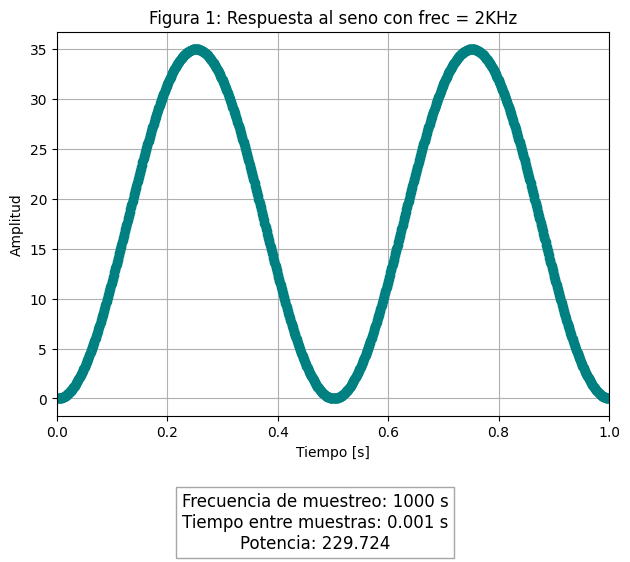

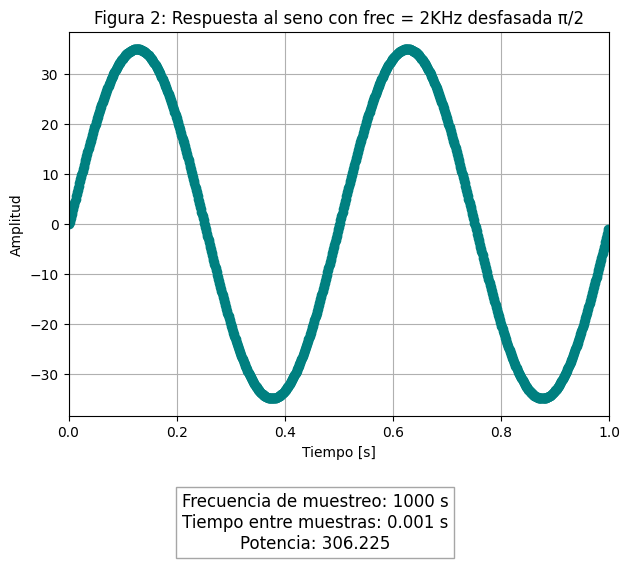

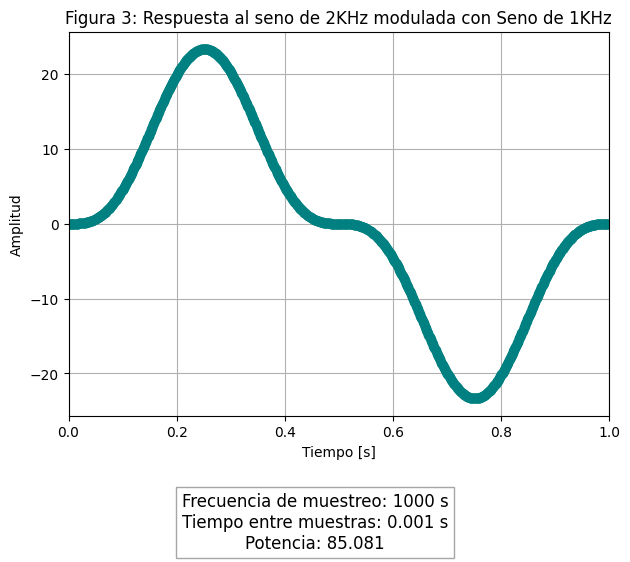

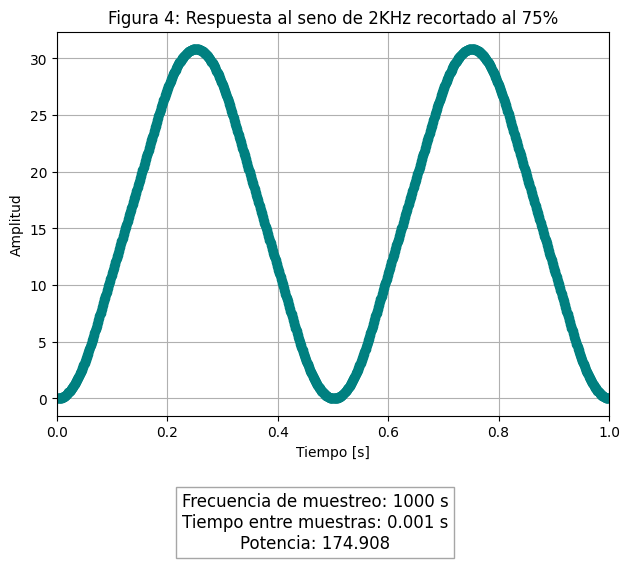

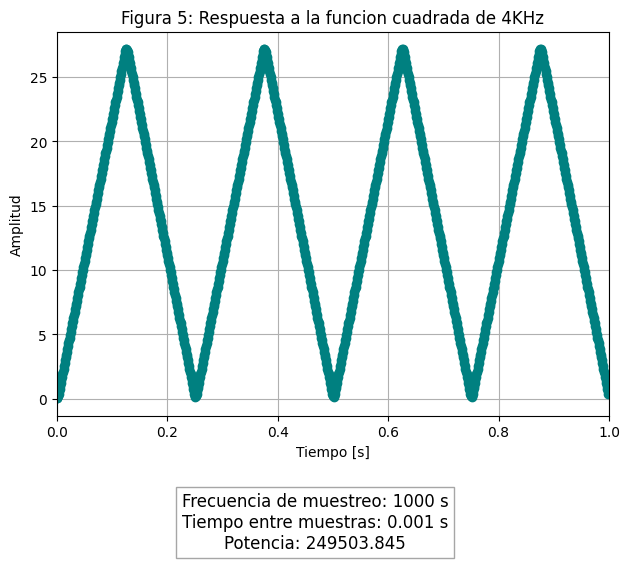

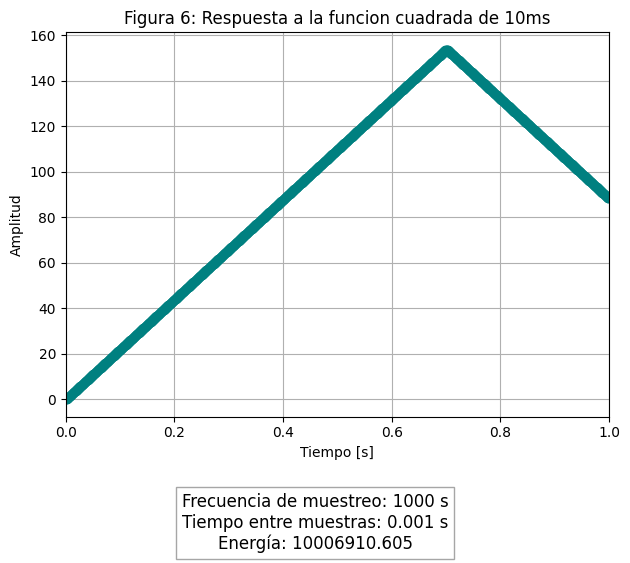

In [7]:
plotear_fig1_a_fig6()

A su vez, se halló la respuesta al impulso del sistema, y a partir de ésta y las señales de las figuras antes mencionadas, se generó la señal de salida a partir de la convolución entre las dos señales, siendo:
\begin{equation}
y[n] = h(n) \circledast x(n)
\end{equation}

Llegando al siguiente gráfico:

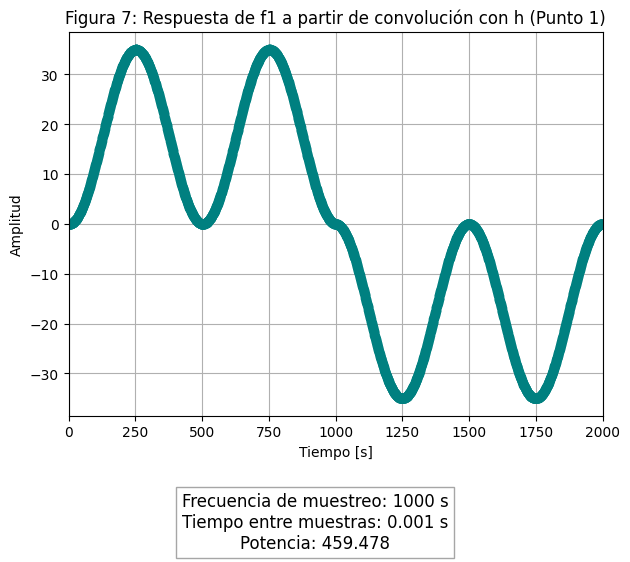

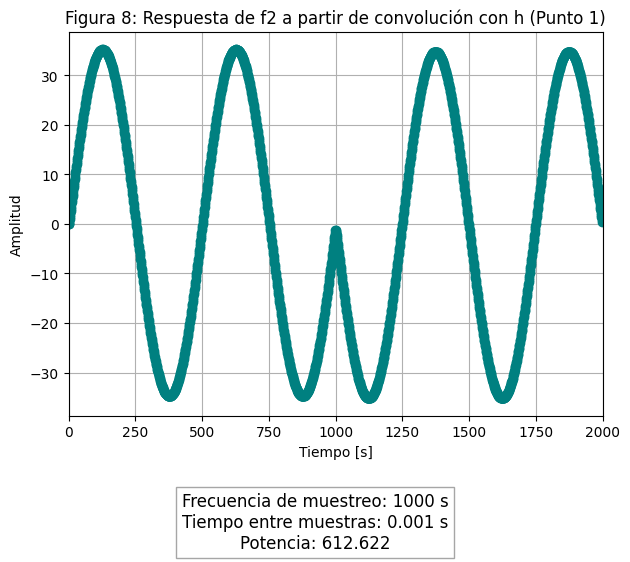

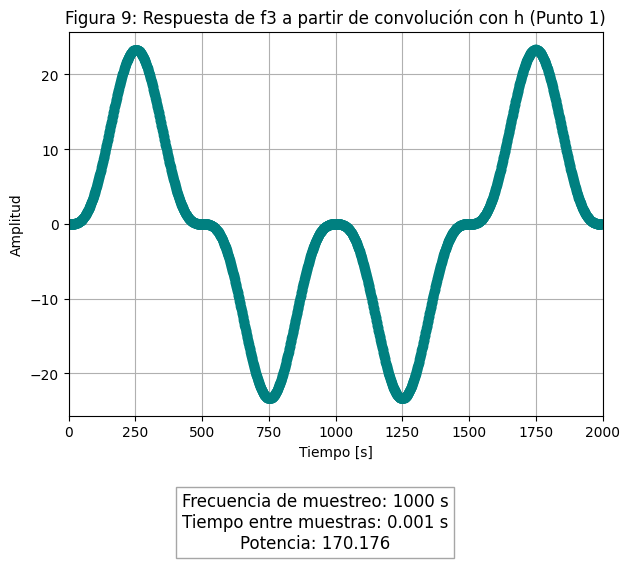

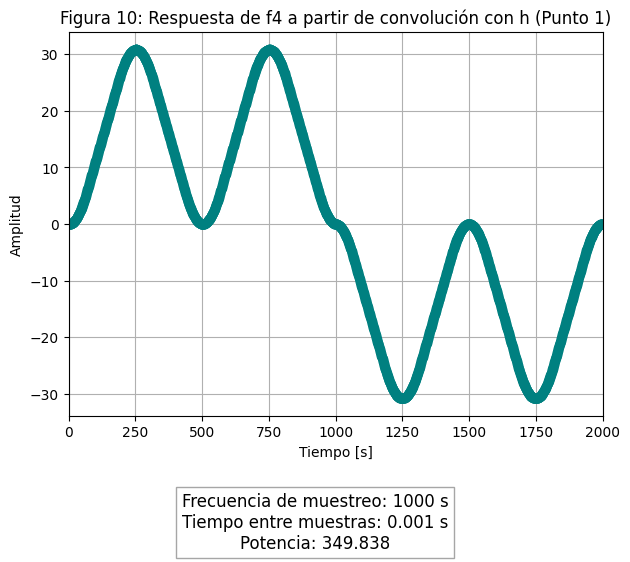

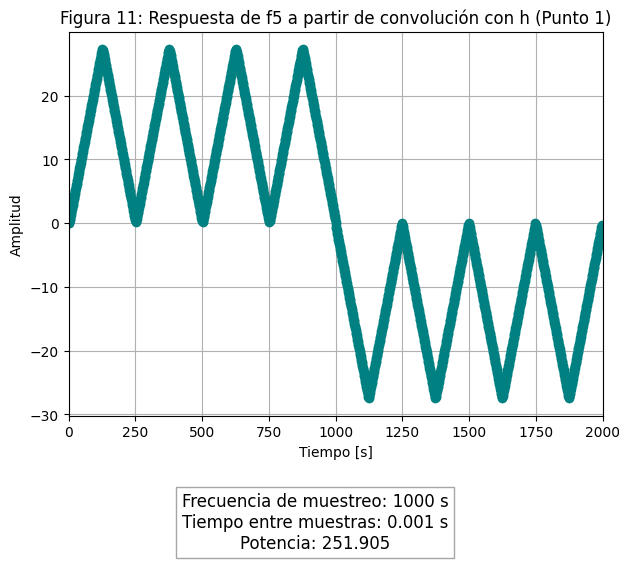

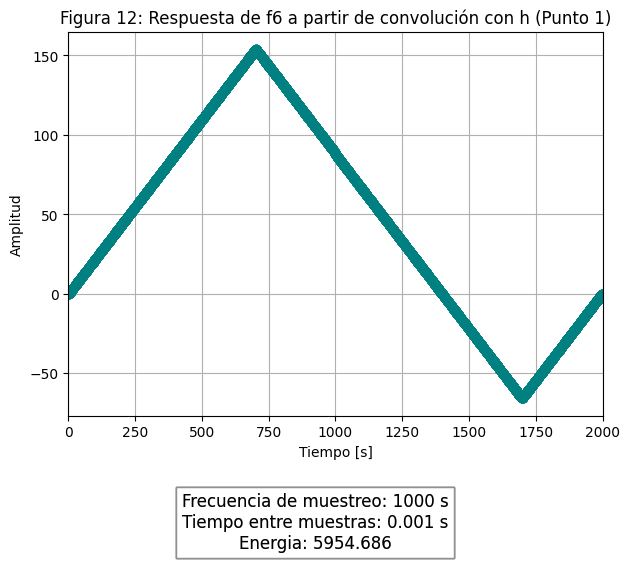

In [9]:
plotear_fig7_a_fig12()

Como puede observarse, tomando como referencia la Fig. 7, la cual es la convolución que utiliza el seno de la Fig.1, la salida presenta una señal que parece ser igual a la Fig. 1 hasta la mitad, siendo que en la segunda mitad se muestra también con los mismos valores, pero "espejada". Por otro lado, con respecto a la potencia, se puede ver que esta se duplica (esto se debe a que la Fig.7 es, en términos absolutos, como si tuviera dos periodos de la Fig.1). Este mismo efecto se replica para las figuras de 7 a 12. 

Este efecto de “espejado” se debe a que la convolución en esas figuras fue realizada con una respuesta al impulso centrada en el tiempo (es decir, con valores tanto positivos como negativos de índice) en lugar de ser causal, comenzando en n=0. Cuando se aplica la convolución directa a una señal con una respuesta de este tipo, el algoritmo interpreta la parte “negativa” de la respuesta como si ocurriera antes del instante inicial, generando una superposición simétrica de la señal hacia adelante y hacia atrás en el tiempo.

En otras palabras, las Figuras 7 a 12 muestran el resultado de una convolución circular, donde la energía de la señal “se pliega” temporalmente debido a que no se desplazó ni recortó la respuesta al impulso correctamente. En cambio, las Figuras 1 a 6 presentan el resultado de una convolución lineal causal, donde la salida comienza solo después del instante inicial y representa físicamente el comportamiento real del sistema.

Este “reflejo” puede eliminarse asegurando que la respuesta al impulso sea causal, es decir, desplazándola para que su primer valor significativo se ubique en n=0. Así, la convolución refleja correctamente la evolución temporal de la señal sin duplicar ni invertir sus componentes.

Por otro lado, se hallaron la respuesta al impulso y la salida correspondiente a una señal de entrada senoidal para los siguientes sistemas:
\begin{equation}
y[n] = x[n] + 3*x[x-10]
\end{equation}
\begin{equation}
y[n] = x[n] + 3*y[x-10]
\end{equation}

Se obtuvieron las dos respuestas al impulso de ambos sistemas a partir de ingresar una señal del tipo delta de Dirac en las respectivas funciones. Una vez obtenida la respuesta al impulso, se convolucionó a partir de la función "convolve" de numpy con la senoidal de entrada que fue utilizada en la Fig.1, obteniendo las respuestas del primer y el segundo sistema y graficándolas como pueden verse en las figuras 8 y 9:

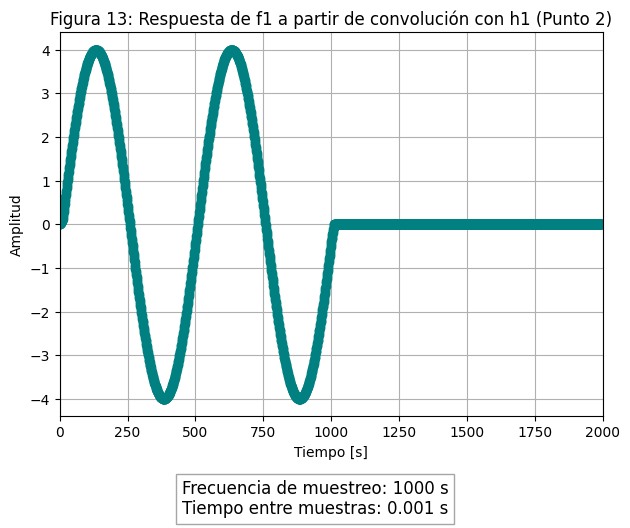

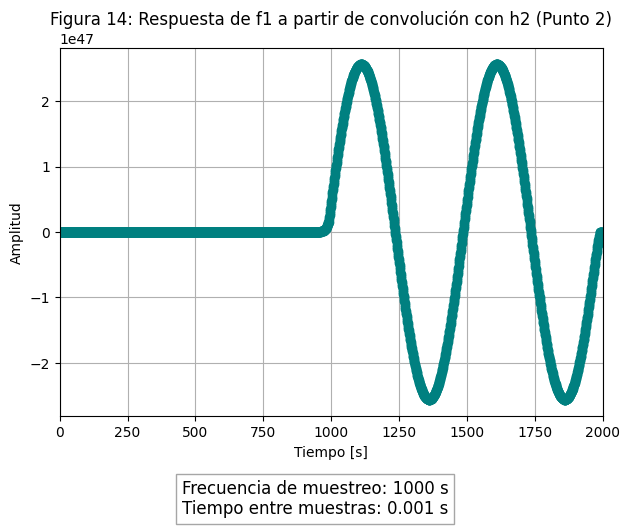

In [10]:
plotear_fig13_a_fig14()

Como podemos observar, la primera función deja intacta toda la primera parte de la senoidal, mientras que la otra mitad la "aplana". Por otro lado, la segunda función realiza la acción inversa: aplana la primera mitad de la señal y deja la segunda mitad, aunque con una diferencia: la amplifica. Como podemos observar a partir de los ejes verticales de ambos gráficos, la Fig.9 tiene valores del orden de 1e47, mientras que la Fig.8 va de -4 a 4 (aprox).

# Conclusión
Se concluye entonces que los sistemas LTI pueden ser utilizados para modificar la forma de las señales, ya sea para convertir una señal cuadrada en una triangular, o "aplanar" una parte de la señal y la otra dejarla intacta o amplificada. Se comprobó también que, al ingresar una función tipo delta de Dirac, la respuesta de los sistemas LTI devuelve su respuesta al impulso, y que a partir de ella podemos conseguir una respuesta un tanto diferente (convolucionando) a la esperada al ingresar una excitación "x" directamente en el sistema.

# Autoevaluación del desarrollo
Resolví la tarea con seguridad. Aprendí cómo obtener la respuesta al impulso de un sistema LTI a partir de una función delta de Dirac y que las respuestas de estos sistemas aplicados al análisis de señales pueden servir para cambiar las formas de las señales para luego poder ser utilizadas en diversas aplicaciones.

Para la realización de este trabajo utilicé IA para la corrección y reaccción de los textos en el informe.

# Bibliografía
- https://numpy.org/doc/stable/reference/generated/numpy.convolve.html
- https://en.wikipedia.org/wiki/Windkessel_effect
- https://portal.amelica.org/ameli/jatsRepo/24/2414009/html/index.html
- https://www.udocz.com/apuntes/1119122/modelo-windkessel-de-3-y-4-elementos
- https://tex.stackexchange.com/questions/351420/how-to-write-a-convolution-and-a-fourier-transform

# Apéndice
## Código Completo:

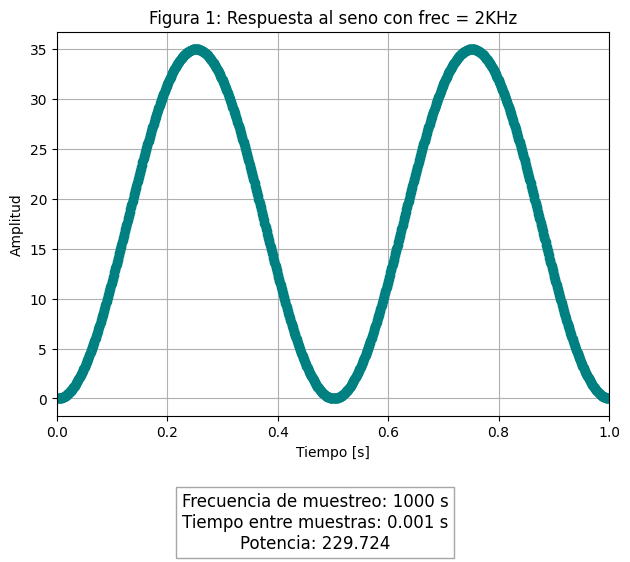

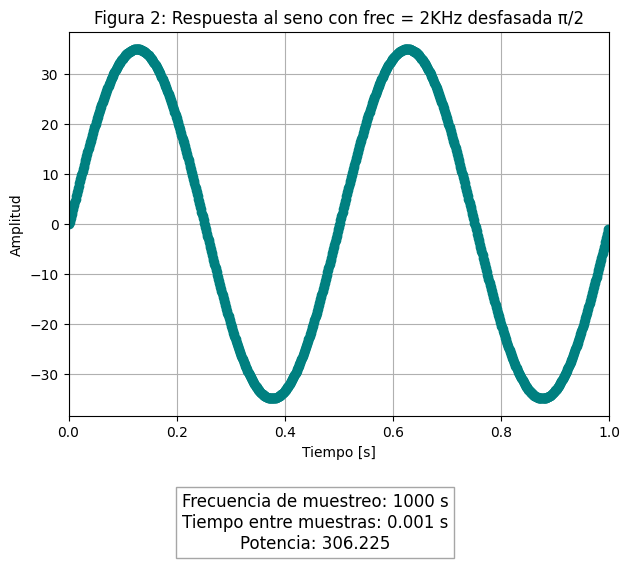

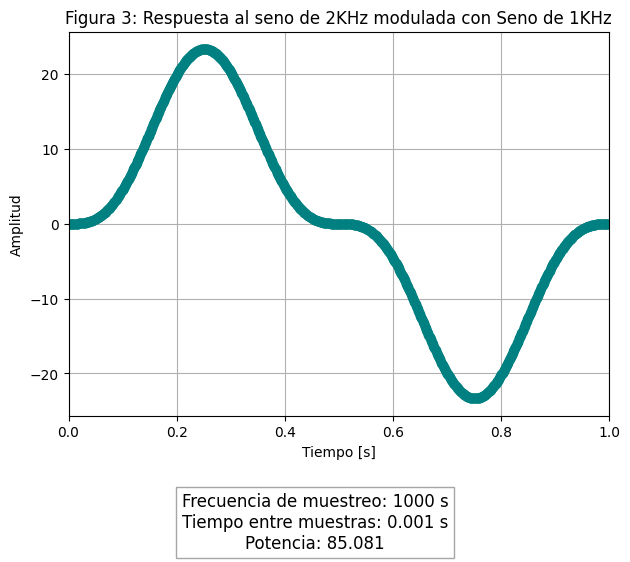

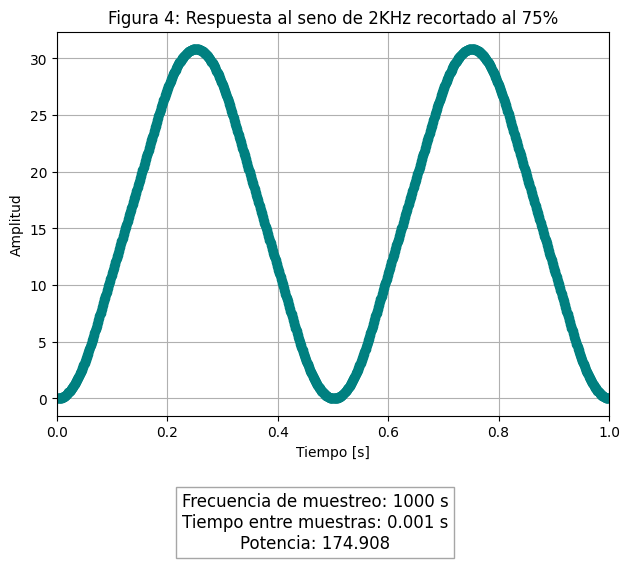

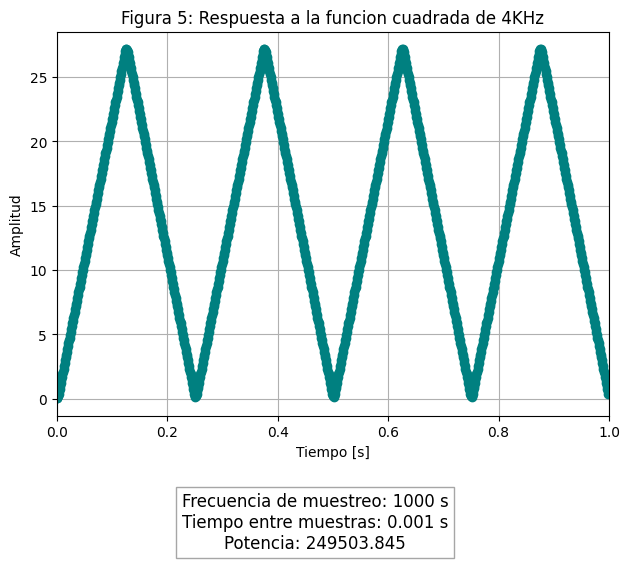

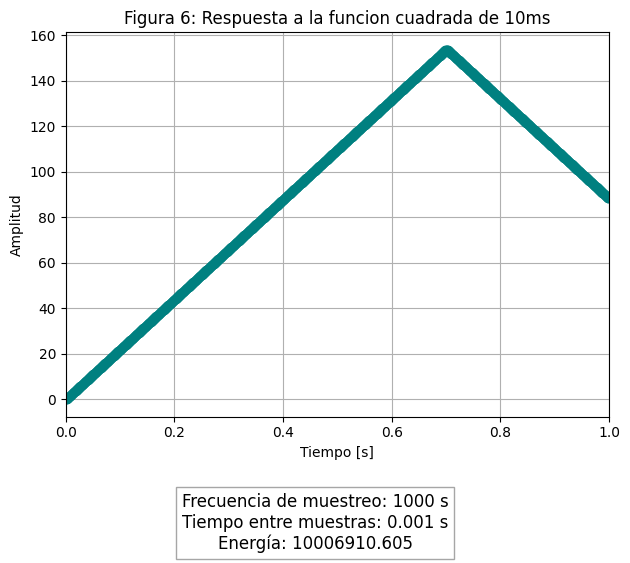

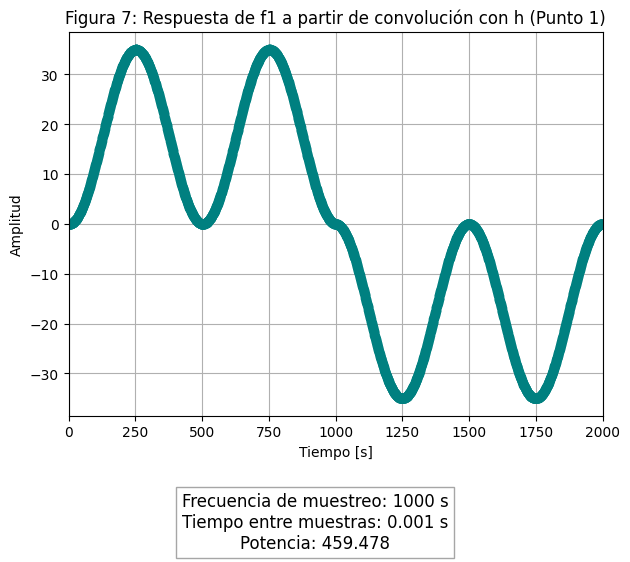

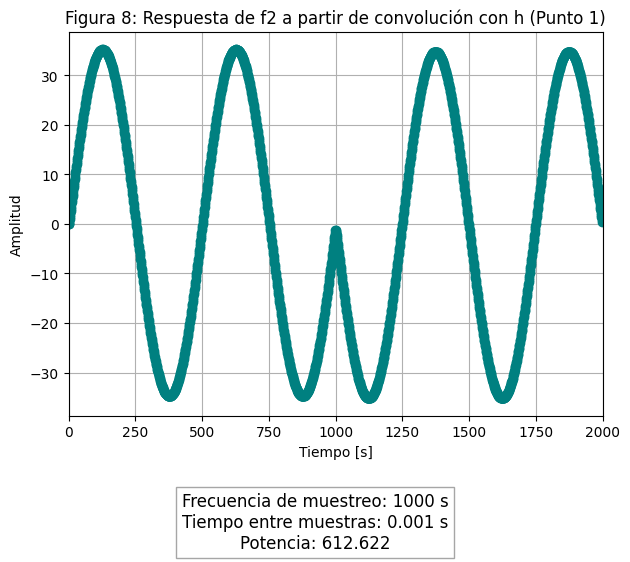

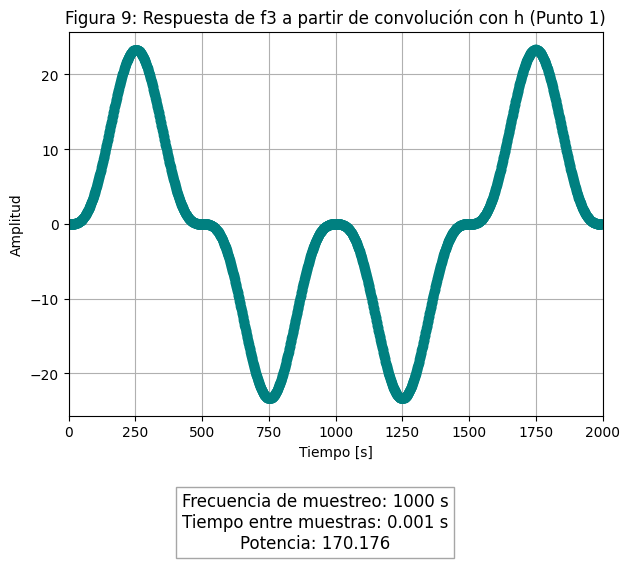

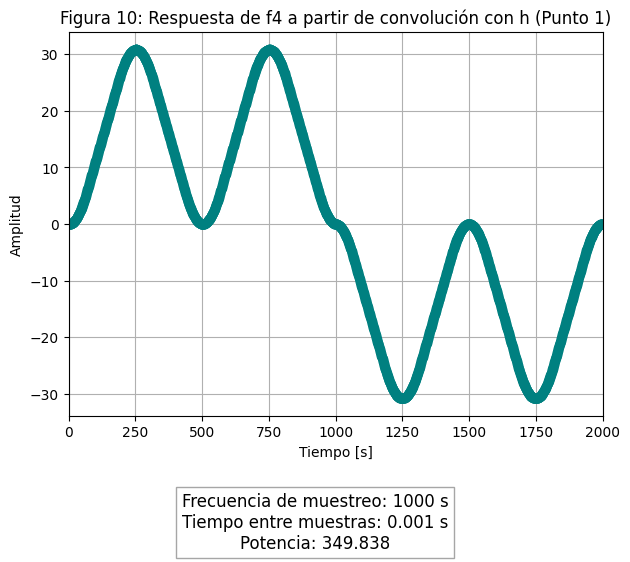

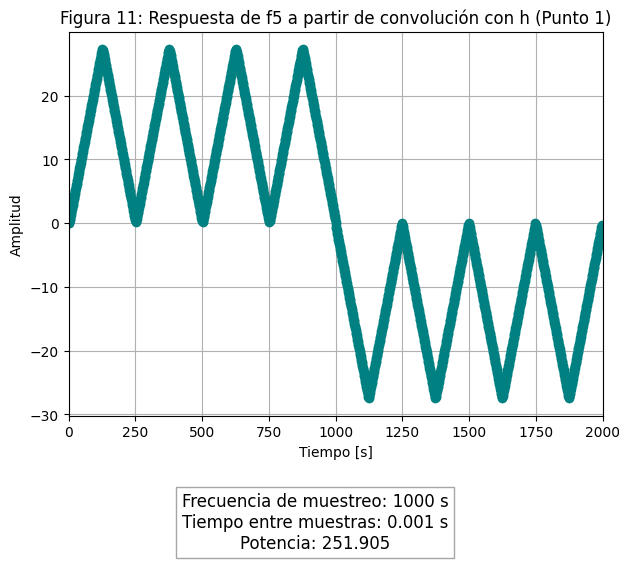

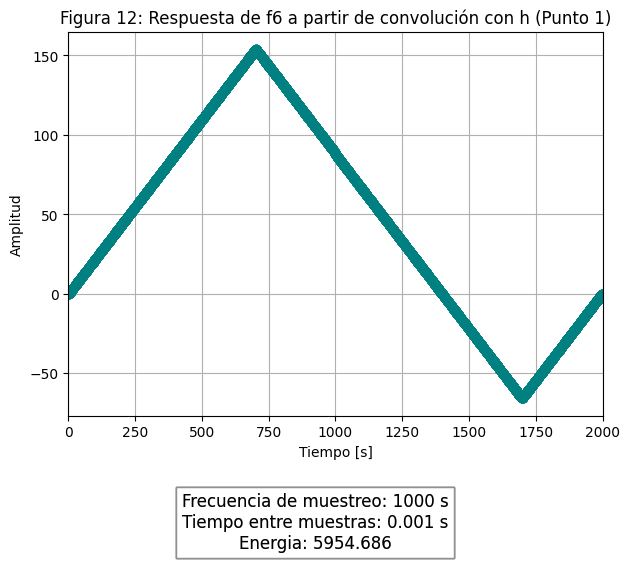

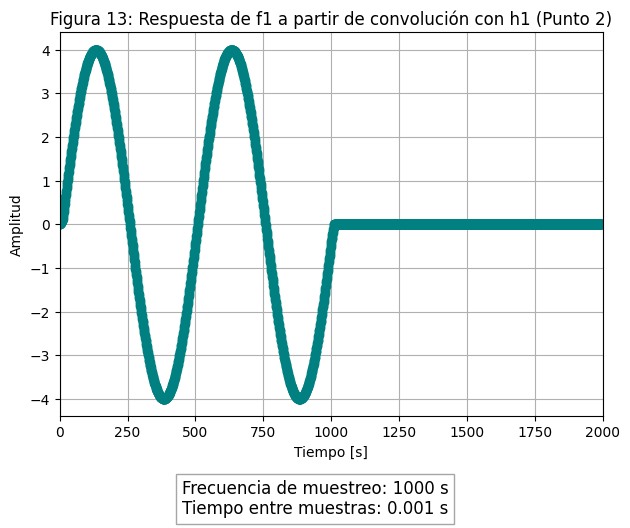

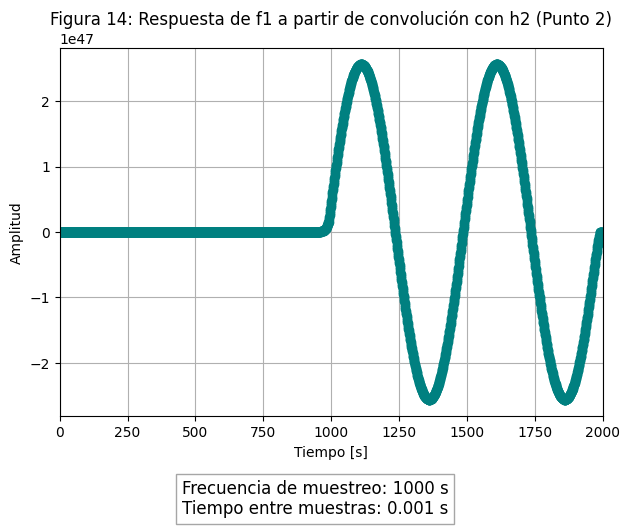

In [4]:
"""
Created on Wed Aug 28 2025

@author: Tomás Altimare Bercovich

Descripción:
------------
    En este trabajo práctico se realizó el análisis 
    de diferentes sisemas LTI excitados con señales 
    realizadas en el trabajo semanal anterior con un 
    generador de señales, graficando las respuestas 
    resultantes a dichas entradas. Se encontró la 
    respuesta al impulso de los sistemas planteados 
    a partir de la función Delta de Dirac utilizando 
    propiedades de los sistemas LTI. Por último, se 
    intentó discretizar la ecuación diferencial 
    correspondiente al modelo Windkessel que describe 
    la dinámica presión-flujo del sistema sanguíneo.

"""

#%% Importo los módulos y bibliotecas que voy a utilizar
import numpy as np
import matplotlib.pyplot as plt
import TS1_Sintesis_de_Señales as TS1 # Importo el TS1 para poder usar las señales

#%%########################
## Definiciones Globales ##
###########################
fs = 1000 # Frecuencia de sampleo
N = 1000 # Cantidad de muestras
ts = 1/fs # Tiempo entre muestras
T_simulacion = N/fs # Tiempo total de simulación
n = np.arange(N) # Las N muestras equiespaciadas
tt = n/fs # Grilla temporal de sampleo

#%% Defino la función Delta
def delta():
    x = np.zeros(N, dtype = float)
    x[1] = 1
    return x

#%%############
## Punto (1) ##
###############

#%% Declaro la función y[n]
def ec_LTI_punto_1(x, N):
    # x: Señal de entrada, N: numero de muestras
    
    """
        Nota: Armo los if con el objetivo de que,
        cuando n sea 0 ó 1, y x[n]=x[-1] ó x[-2],
        Python no tome los últimos valores del array.
        Esto lo hago debido a que quiero que
        x[-1] = x[-2] = y[-1] = y[-2] = 0, pero a su
        vez, no quiero modificar los últimos valores
        de los respectivos array.
    """
    
    y = np.zeros(N, dtype = float)
    for n in range(N):
        if n == 0: 
            y[n] = (3*(10**(-2))*x[n])
        elif n == 1:
            y[n] = (3*(10**(-2))*x[n] + 
                    5*(10**(-2))*x[n-1])
        elif n > 1:
            y[n] = (3*(10**(-2))*x[n] + 
                    5*(10**(-2))*x[n-1] + 
                    3*(10**(-2))*x[n-2] +
                    1.5*y[n-1]-0.5*y[n-2])
    return y

#%% Sintetizo las respuestas a las diferentes señales de entrada
respuesta_señal_f1 = ec_LTI_punto_1(TS1.x1, N)
respuesta_señal_f2 = ec_LTI_punto_1(TS1.x2, N)
respuesta_señal_f3 = ec_LTI_punto_1(TS1.x_modulada, N)
respuesta_señal_f4 = ec_LTI_punto_1(TS1.x_recortada, N)
respuesta_señal_f5 = ec_LTI_punto_1(TS1.xsq1, N)
respuesta_señal_f6 = ec_LTI_punto_1(TS1.xsq2, N)

#%% Imprimo las respuestas
def plotear_fig1_a_fig6 ():
    plt.figure(1)
    plt.title('Figura 1: Respuesta al seno con frec = 2KHz')
    plt.grid(True)
    plt.plot(tt, respuesta_señal_f1, 'o--', color = 'teal')
    plt.xlim(0, T_simulacion)
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    # Añado una leyenda con los datos sobre la señal:
    potencia = np.sum(respuesta_señal_f1 ** 2)/(2*N+1)
    info_fig1 = (
        f"Frecuencia de muestreo: {fs} s\n"
        f"Tiempo entre muestras: {ts} s\n"
        f"Potencia: {potencia:.3f}"
    )
    plt.figtext(0.5, -0.1, info_fig1, fontsize=12, ha="center", va="center",
                bbox=dict(facecolor="white", alpha=0.7, edgecolor="grey"))
    plt.tight_layout()
    
    plt.figure(2)
    plt.title('Figura 2: Respuesta al seno con frec = 2KHz desfasada π/2')
    plt.grid(True)
    plt.plot(tt, respuesta_señal_f2, 'o--', color = 'teal')
    plt.xlim(0, T_simulacion)
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    potencia = np.sum(respuesta_señal_f2 ** 2)/(2*N+1)
    info_fig2 = (
        f"Frecuencia de muestreo: {fs} s\n"
        f"Tiempo entre muestras: {ts} s\n"
        f"Potencia: {potencia:.3f}"
    )
    plt.figtext(0.5, -0.1, info_fig2, fontsize=12, ha="center", va="center",
                bbox=dict(facecolor="white", alpha=0.7, edgecolor="grey"))
    plt.tight_layout()
    
    plt.figure(3)
    plt.title('Figura 3: Respuesta al seno de 2KHz modulada con Seno de 1KHz')
    plt.grid(True)
    plt.plot(tt, respuesta_señal_f3, 'o--', color = 'teal')
    plt.xlim(0, T_simulacion)
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    potencia = np.sum(respuesta_señal_f3 ** 2)/(2*N+1)
    info_fig3 = (
        f"Frecuencia de muestreo: {fs} s\n"
        f"Tiempo entre muestras: {ts} s\n"
        f"Potencia: {potencia:.3f}"
    )
    plt.figtext(0.5, -0.1, info_fig3, fontsize=12, ha="center", va="center",
                bbox=dict(facecolor="white", alpha=0.7, edgecolor="grey"))
    plt.tight_layout()
    
    plt.figure(4)
    plt.title('Figura 4: Respuesta al seno de 2KHz recortado al 75%')
    plt.grid(True)
    plt.plot(tt, respuesta_señal_f4, 'o--', color = 'teal')
    plt.xlim(0, T_simulacion)
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    potencia = np.sum(respuesta_señal_f4 ** 2)/(2*N+1)
    info_fig4 = (
        f"Frecuencia de muestreo: {fs} s\n"
        f"Tiempo entre muestras: {ts} s\n"
        f"Potencia: {potencia:.3f}"
    )
    plt.figtext(0.5, -0.1, info_fig4, fontsize=12, ha="center", va="center",
                bbox=dict(facecolor="white", alpha=0.7, edgecolor="grey"))
    plt.tight_layout()
    
    plt.figure(5)
    plt.title('Figura 5: Respuesta a la funcion cuadrada de 4KHz')
    plt.grid(True)
    plt.plot(tt, respuesta_señal_f5, 'o--', color = 'teal')
    plt.xlim(0, T_simulacion)
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    potencia = np.sum(respuesta_señal_f5 ** 2)
    info_fig5 = (
        f"Frecuencia de muestreo: {fs} s\n"
        f"Tiempo entre muestras: {ts} s\n"
        f"Potencia: {potencia:.3f}"
    )
    plt.figtext(0.5, -0.1, info_fig5, fontsize=12, ha="center", va="center",
                bbox=dict(facecolor="white", alpha=0.7, edgecolor="grey"))
    plt.tight_layout()
    
    plt.figure(6)
    plt.title('Figura 6: Respuesta a la funcion cuadrada de 10ms')
    plt.grid(True)
    plt.plot(tt, respuesta_señal_f6, 'o--', color = 'teal')
    plt.xlim(0, T_simulacion)
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    energia = np.sum(respuesta_señal_f6 ** 2)
    info_fig6 = (
        f"Frecuencia de muestreo: {fs} s\n"
        f"Tiempo entre muestras: {ts} s\n"
        f"Energía: {energia:.3f}"
    )
    plt.figtext(0.5, -0.1, info_fig6, fontsize=12, ha="center", va="center",
                bbox=dict(facecolor="white", alpha=0.7, edgecolor="grey"))
    plt.tight_layout()

#%% Busco la respuesta al impulso: Para ello, busco excitar a mi sistema LTI con una delta
h_punto1 = ec_LTI_punto_1(delta(), N)
respuesta_señal_f1_con_h_punto1 = np.convolve(TS1.x1, h_punto1, mode='full')
respuesta_señal_f2_con_h_punto1 = np.convolve(TS1.x2, h_punto1, mode='full')
respuesta_señal_f3_con_h_punto1 = np.convolve(TS1.x_modulada, h_punto1, mode='full')
respuesta_señal_f4_con_h_punto1 = np.convolve(TS1.x_recortada, h_punto1, mode='full')
respuesta_señal_f5_con_h_punto1 = np.convolve(TS1.xsq1, h_punto1, mode='full')
respuesta_señal_f6_con_h_punto1 = np.convolve(TS1.xsq2, h_punto1, mode='full')

#%% Imprimo la respuesta del sistema tras convolucionar la señal f1 con con la respuesta al impulso del sistema

def plotear_fig7_a_fig12():
    # plt.figure(7)
    # plt.title('Figura 7: Respuesta de f1 a partir de convolución con h (Punto 1)')
    # plt.grid(True)
    # plt.plot(respuesta_señal_f1_con_h_punto1, 'o--', color = 'teal')
    # plt.xlim(0, 2000)
    # plt.xlabel("Tiempo [s]")
    # plt.ylabel("Amplitud")
    # # Añado una leyenda con los datos sobre la señal:
    # potencia = np.sum(respuesta_señal_f1_con_h_punto1 ** 2)/(2*N+1)
    # info_fig1 = (
    #     f"Frecuencia de muestreo: {fs} s\n"
    #     f"Tiempo entre muestras: {ts} s\n"
    #     f"Potencia: {potencia:.3f}"
    # )
    # plt.figtext(0.5, -0.1, info_fig1, fontsize=12, ha="center", va="center",
    #             bbox=dict(facecolor="white", alpha=0.7, edgecolor="grey"))
    # plt.tight_layout()
    
    figuras = [
        ("Figura 7: Respuesta de f1 a partir de convolución con h (Punto 1)", respuesta_señal_f1_con_h_punto1),
        ("Figura 8: Respuesta de f2 a partir de convolución con h (Punto 1)", respuesta_señal_f2_con_h_punto1),
        ("Figura 9: Respuesta de f3 a partir de convolución con h (Punto 1)", respuesta_señal_f3_con_h_punto1),
        ("Figura 10: Respuesta de f4 a partir de convolución con h (Punto 1)", respuesta_señal_f4_con_h_punto1),
        ("Figura 11: Respuesta de f5 a partir de convolución con h (Punto 1)", respuesta_señal_f5_con_h_punto1),

    ]
    
    for i, (titulo, data) in enumerate(figuras, start=7):
        plt.figure(i)
        figura = i-6
        plt.title(f"Figura {i}: Respuesta de f{figura} a partir de convolución con h (Punto 1)")
        plt.grid(True)
        plt.plot(data, 'o--', color='teal')
        plt.xlim(0, 2000)
        plt.xlabel("Tiempo [s]")
        plt.ylabel("Amplitud")
        # Añado una leyenda con los datos sobre la señal:
        potencia = np.sum(data ** 2)/(2*N+1)
        info_fig1 = (
            f"Frecuencia de muestreo: {fs} s\n"
            f"Tiempo entre muestras: {ts} s\n"
            f"Potencia: {potencia:.3f}"
        )
        plt.figtext(0.5, -0.1, info_fig1, fontsize=12, ha="center", va="center",
                    bbox=dict(facecolor="white", alpha=0.7, edgecolor="grey"))
        plt.tight_layout()
    
        plt.figure(12)
        plt.title('Figura 12: Respuesta de f6 a partir de convolución con h (Punto 1)')
        plt.grid(True)
        plt.plot(respuesta_señal_f6_con_h_punto1, 'o--', color = 'teal')
        plt.xlim(0, 2000)
        plt.xlabel("Tiempo [s]")
        plt.ylabel("Amplitud")
        # Añado una leyenda con los datos sobre la señal:
        energia = np.sum(respuesta_señal_f6_con_h_punto1 ** 2)/(2*N+1)
        info_fig1 = (
            f"Frecuencia de muestreo: {fs} s\n"
            f"Tiempo entre muestras: {ts} s\n"
            f"Energia: {energia:.3f}"
        )
        plt.figtext(0.5, -0.1, info_fig1, fontsize=12, ha="center", va="center",
                    bbox=dict(facecolor="white", alpha=0.7, edgecolor="grey"))
        plt.tight_layout()
        
#%%############
## Punto (2) ##
###############
#%% Declaro las funciones y[n]
def ec1_LTI_punto_2(x, N):
    # x: Señal de entrada, N: numero de muestras
    
    y = np.zeros(N, dtype = float)
    for n in range(N):
        if n < 10:
            y[n] = x[n]
        else:
            y[n] = x[n] + 3*x[n-10]
    return y

def ec2_LTI_punto_2(x, N):
    # x: Señal de entrada, N: numero de muestras
    
    y = np.zeros(N, dtype = float)
    for n in range(N):
        for n in range(N):
            if n < 10:
                y[n] = x[n]
            else:
                y[n] = x[n] + 3*y[n-10]
    return y

#%% Hallar la respuesta al impulso y la salida correspondiente a una señal de entrada senoidal
h1_punto2 = ec1_LTI_punto_2(delta(), N)
h2_punto2 = ec2_LTI_punto_2(delta(), N)

respuesta_señal_f1_con_h1_punto2 = np.convolve(TS1.x1, h1_punto2, mode='full')
respuesta_señal_f1_con_h2_punto2 = np.convolve(TS1.x1, h2_punto2, mode='full')

def plotear_fig13_a_fig14():
    plt.figure(13)
    plt.title('Figura 13: Respuesta de f1 a partir de convolución con h1 (Punto 2)')
    plt.grid(True)
    plt.plot(respuesta_señal_f1_con_h1_punto2, 'o--', color = 'teal')
    plt.xlim(0, 2000)
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    # Añado una leyenda con los datos sobre la señal:
    info_fig1 = (
        f"Frecuencia de muestreo: {fs} s\n"
        f"Tiempo entre muestras: {ts} s"
    )
    plt.figtext(0.5, -0.05, info_fig1, fontsize=12, ha="center", va="center",
                bbox=dict(facecolor="white", alpha=0.7, edgecolor="grey"))
    plt.tight_layout()
    
    plt.figure(14)
    plt.title('Figura 14: Respuesta de f1 a partir de convolución con h2 (Punto 2)')
    plt.grid(True)
    plt.plot(respuesta_señal_f1_con_h2_punto2, 'o--', color = 'teal')
    plt.xlim(0, 2000)
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    # Añado una leyenda con los datos sobre la señal:
    info_fig1 = (
        f"Frecuencia de muestreo: {fs} s\n"
        f"Tiempo entre muestras: {ts} s"
    )
    plt.figtext(0.5, -0.05, info_fig1, fontsize=12, ha="center", va="center",
                bbox=dict(facecolor="white", alpha=0.7, edgecolor="grey"))
    plt.tight_layout()
    
#%% Ploteo de prueba
plotear_fig1_a_fig6()
plotear_fig7_a_fig12()
plotear_fig13_a_fig14()

#%%##############
## Punto Bonus ##
#################
#%% Defino constantes de Compliance y Resistencia vascular
def plotear_bonus():
    t_sim = 5
    
    compilance = 0.00648 # cm³/mmHg
    res_vascular = 81.68 # mmHg/cm³/sec
    t = np.arange(0, t_sim) # Eje del tiempo
    Pi = 80
    
    P = Pi * np.exp(-(t-t[0]) / (res_vascular*compilance)) # Ecuación de la presión con respecto del tiempo
    Pdt = P * (t-t[0]) / ((res_vascular * compilance)**2)
    
    Q = compilance * Pdt + P/res_vascular
    
    plt.figure(10)
    plt.title('Figura 10: Flujo de sangre en el tiempo')
    plt.grid(True)
    plt.plot(Q, 'x--', color = 'blue')
    plt.plot(P, 'x--', color = 'red')
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Flujo")
    
    plt.tight_layout()